In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/govindd1/Desktop/Code/VR-Project/ACC_data_from_different_subjects/E4_ACC_data_3.csv')
df = df.drop('round', 1)
df.head()

C:\Users\govindd1\AppData\Local\Temp/ipykernel_426472/708278336.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('round', 1)


,datetime,acc_x,acc_y,acc_z,subject_id,type,label
0,2021-12-08 14:50:11+00:00,-6,22,62,3,InMotion,downstairs
1,2021-12-08 14:50:11.031250+00:00,-7,20,61,3,InMotion,downstairs
2,2021-12-08 14:50:11.062500+00:00,-7,18,59,3,InMotion,downstairs
3,2021-12-08 14:50:11.093750+00:00,-8,16,58,3,InMotion,downstairs
4,2021-12-08 14:50:11.125000+00:00,-7,16,57,3,InMotion,downstairs


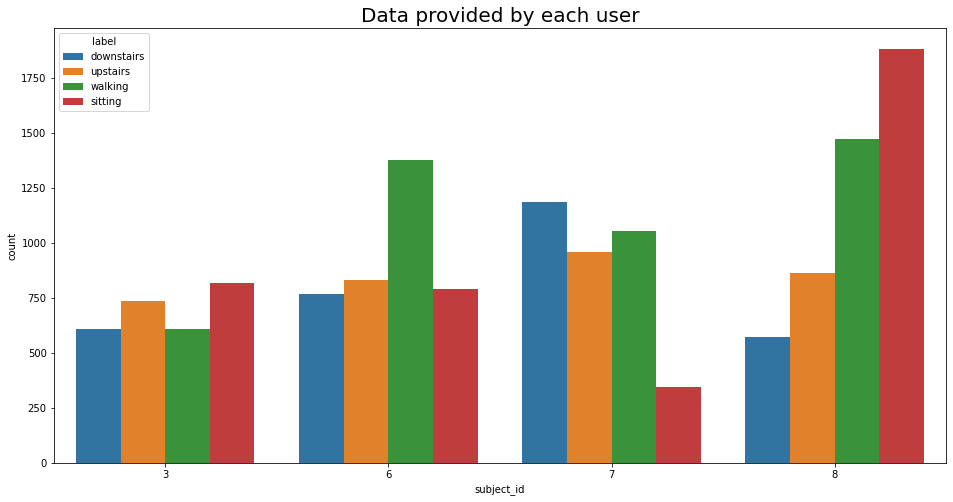

In [3]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = df)
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['activity'] = label.fit_transform(df['label'])
label.classes_
df

,datetime,acc_x,acc_y,acc_z,subject_id,type,label,activity
0,2021-12-08 14:50:11+00:00,-6,22,62,3,InMotion,downstairs,0
1,2021-12-08 14:50:11.031250+00:00,-7,20,61,3,InMotion,downstairs,0
2,2021-12-08 14:50:11.062500+00:00,-7,18,59,3,InMotion,downstairs,0
3,2021-12-08 14:50:11.093750+00:00,-8,16,58,3,InMotion,downstairs,0
4,2021-12-08 14:50:11.125000+00:00,-7,16,57,3,InMotion,downstairs,0
...,...,...,...,...,...,...,...,...
14875,2021-12-09 03:01:44.718750+00:00,-14,3,61,8,MotionLess,sitting,1
14876,2021-12-09 03:01:44.750000+00:00,-14,3,61,8,MotionLess,sitting,1
14877,2021-12-09 03:01:44.781250+00:00,-14,3,61,8,MotionLess,sitting,1
14878,2021-12-09 03:01:44.812500+00:00,-14,4,61,8,MotionLess,sitting,1


In [37]:
from sklearn.preprocessing import StandardScaler

X = df[['acc_x', 'acc_y', 'acc_z']]
y = df['activity']
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # scaled_X = pd.DataFrame(data = X, columns = ['accXmean',	'accYmean',	'accZmean',	'accXstd',	'accYstd',	'accZstd',	'MagnitudeMean', 'covXYmean',	'covYZmean',	'covXZmean'])
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

array([[ 0.342682  , -1.00316085,  0.23880982],
       [-0.14161898,  0.720686  ,  1.03402522],
       [-0.14161898,  0.73942346,  1.12757997],
       ...,
       [-0.48062966,  0.68321106,  0.98724784],
       [ 0.58483248,  0.98301052, -0.32251869],
       [ 3.34534804, -0.36608701,  0.09847769]])

Accuracy: 0.6612903225806451

 ------------------------------------------ RandomForestClassifier() Classification Report-------------------------------------------------

              precision    recall  f1-score   support

           0       0.53      0.50      0.51       611
           1       0.90      0.90      0.90       741
           2       0.53      0.51      0.52       661
           3       0.64      0.69      0.66       963

    accuracy                           0.66      2976
   macro avg       0.65      0.65      0.65      2976
weighted avg       0.66      0.66      0.66      2976

 ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------


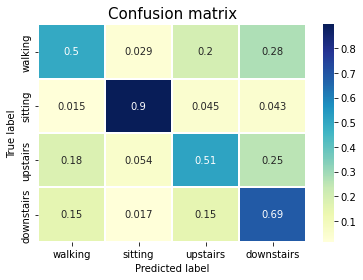

----------------------------------------------  RandomForestClassifier() K-Fold Report  ------------------------------------------------------ 

 * Results: [0.65456989 0.66263441 0.65625    0.65961022]

 * Average acuracy: 0.658266129032258 

<--------------------------------------------------------   END   ------------------------------------------------------------------>


In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



classifiers = [
# KNeighborsClassifier(3),
# SVC(kernel="rbf", C=0.025, probability=True)
# NuSVC(probability=True),
RandomForestClassifier()
# DecisionTreeClassifier()
# AdaBoostClassifier()
# GradientBoostingClassifier()
]
for classifier in classifiers:
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                   ('classifier', classifier)])
# pipe.fit(X_train, y_train)   
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n ------------------------------------------", classifier , "Classification Report-------------------------------------------------\n")
    print(classification_report(y_test, y_pred))    


# K-Fold 
kfold = 4
results = cross_val_score(classifier, X_train, y_train, cv=kfold)


print(" ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------")
labels = ['walking', 'sitting',  'upstairs', 'downstairs']
# labels = ['MotionLess', 'InMotion']
_y_test = y_test
_y_pred = y_pred
confusion_matrix = confusion_matrix(_y_test, _y_pred)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# print(" ------------------------------------------------------ AUC SCORE -------------------------------------------------------------------")
# skplt.metrics.plot_roc_curve(y_test, y_pred)
# plt.show()
    
print("---------------------------------------------- ", classifier , "K-Fold Report  ------------------------------------------------------", "\n")
# print("model score: %.3f" % pipe.score(X_test, y_test))
# print('------------------------------------   REPORT   ----------------------------------', "\n")
print(' * Results: {}'.format(results))
print('\n * Average acuracy: {}'.format(np.mean(results)), "\n")

print('<--------------------------------------------------------   END   ------------------------------------------------------------------>')

Area Under the Curve Score :  0.977434561245882


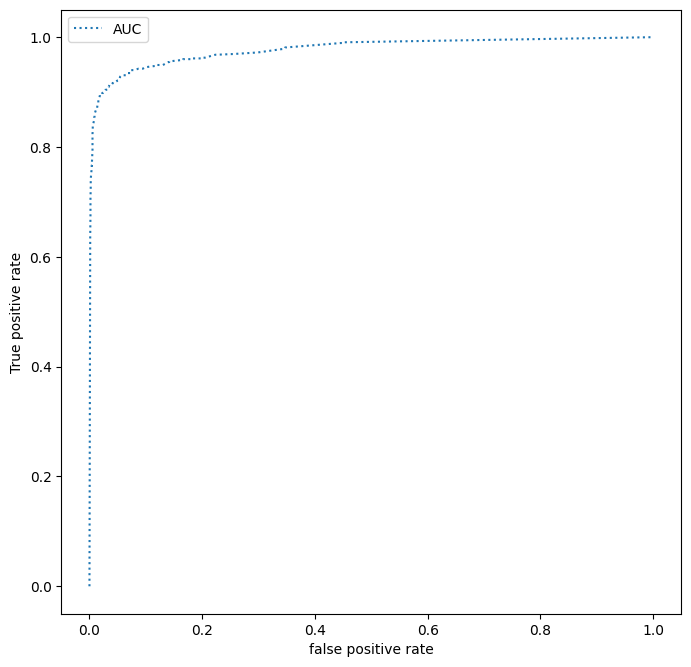

In [11]:

from sklearn.metrics import roc_auc_score, roc_curve, auc

y_pred_probabilty = classifier.predict_proba(X_test)
print("Area Under the Curve Score : ", roc_auc_score(y_test, y_pred_probabilty[:,1]))


fpr, tpr, threshold = roc_curve(y_test, y_pred_probabilty[:,1])
auc = auc(fpr, tpr)

plt.figure(figsize=(8,8), dpi = 100)
plt.plot(fpr, tpr, linestyle = ':', label = 'AUC')

plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()


In [12]:


from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

subject_ids = list(df.subject_id.unique())
subject_ids

LOOCV_accuracy = []
LOOCV_f1 = []
y_preds = []
y_tests = []



for subject in subject_ids:
    test = df.loc[df['subject_id']==subject]
    train = df.loc[df['subject_id']!=subject]
    
    
    train = train[['acc_x',	'acc_y', 'acc_z',	'activity']]
    test = test[['acc_x',	'acc_y', 'acc_z',	'activity']]
    
    X_train = train.iloc[:, :-1].values
    y_train = train.iloc[:, -1].values
    X_test = test.iloc[:, :-1].values
    y_test = test.iloc[:, -1].values
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Random Forest model
    clf = RandomForestClassifier(n_estimators=750,
    random_state=1337,
    max_depth=25,
    min_samples_leaf=1, class_weight='balanced_subsample' )
    
    #Fit and Predict using RF model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_preds = y_pred
    y_tests = y_test
    #Print Accuracy Score
    print('Completed LOOCV for Subject ', +  subject)
    
    LOOCV_accuracy.append(accuracy_score(y_test, y_pred))
    LOOCV_f1.append(f1_score(y_test, y_pred,average='weighted'))
    
    
    

Completed LOOCV for Subject  3
Completed LOOCV for Subject  7
Completed LOOCV for Subject  6
Completed LOOCV for Subject  8


In [35]:
LOOCV_accuracy


[0.7665958576739246,
 0.6958874458874459,
 0.8141567963902989,
 0.8127606338615513]

In [14]:
group_by_label = df.groupby(by=['subject_id'])
gpdf3 = group_by_label.get_group(3)

In [15]:
gpdf3

,datetime,acc_x,acc_y,acc_z,subject_id,type,label,activity
0,2021-12-08 14:50:11+00:00,-6,22,62,3,InMotion,downstairs,0
1,2021-12-08 14:50:11.031250+00:00,-7,20,61,3,InMotion,downstairs,0
2,2021-12-08 14:50:11.062500+00:00,-7,18,59,3,InMotion,downstairs,0
3,2021-12-08 14:50:11.093750+00:00,-8,16,58,3,InMotion,downstairs,0
4,2021-12-08 14:50:11.125000+00:00,-7,16,57,3,InMotion,downstairs,0
...,...,...,...,...,...,...,...,...
2767,2021-12-08 14:51:42.468750+00:00,-32,34,43,3,MotionLess,sitting,1
2768,2021-12-08 14:51:42.500000+00:00,-32,34,43,3,MotionLess,sitting,1
2769,2021-12-08 14:51:42.531250+00:00,-32,34,43,3,MotionLess,sitting,1
2770,2021-12-08 14:51:42.562500+00:00,-32,34,44,3,MotionLess,sitting,1


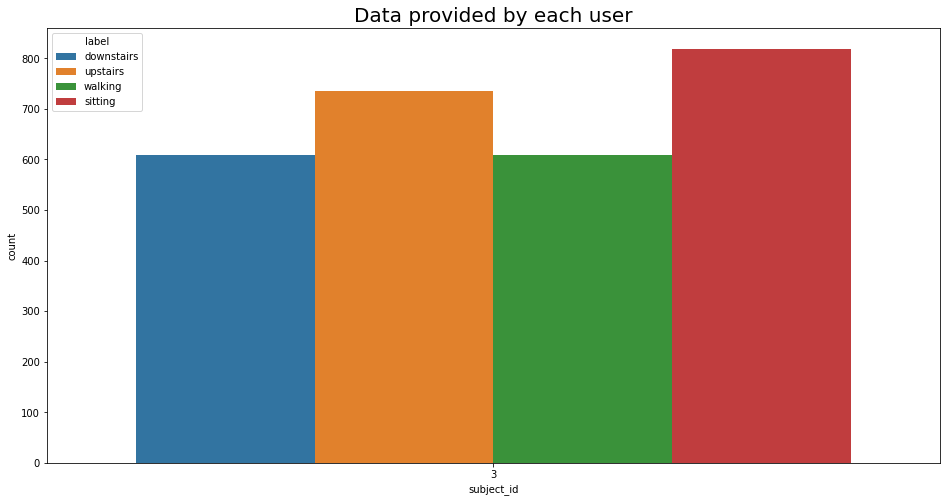

In [16]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = gpdf3)
plt.show()

Class=0, n=819 (25.000%)
Class=2, n=819 (25.000%)
Class=3, n=819 (25.000%)
Class=1, n=819 (25.000%)


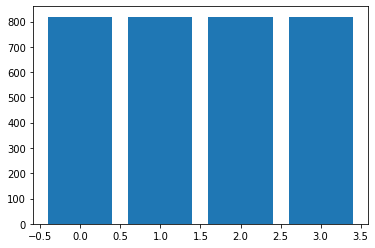

In [17]:
X = gpdf3[['acc_x', 'acc_y', 'acc_z']]
y = gpdf3['label']

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter


y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


Class=0, n=1376 (25.000%)
Class=2, n=1376 (25.000%)
Class=3, n=1376 (25.000%)
Class=1, n=1376 (25.000%)


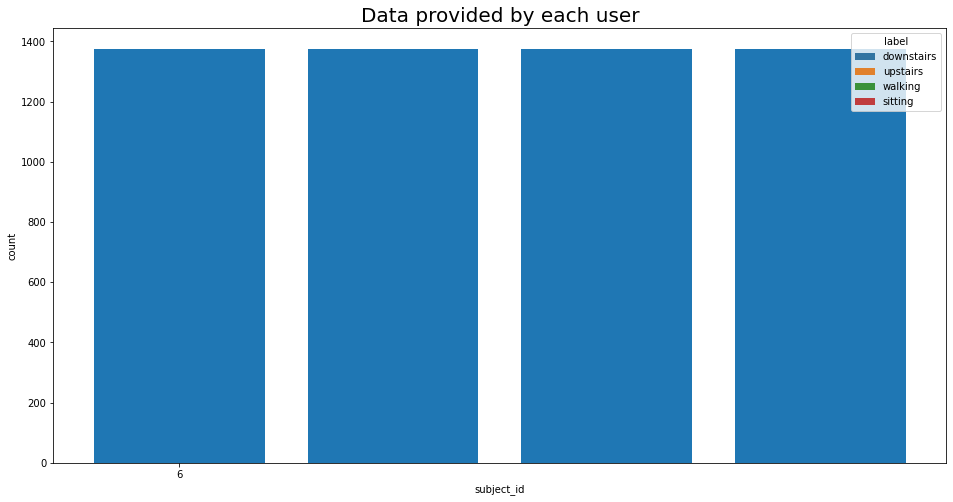

In [24]:
group_by_label = df.groupby(by=['subject_id'])
gpdf6 = group_by_label.get_group(6)
# gpdf6
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = gpdf6)
X = gpdf6[['acc_x', 'acc_y', 'acc_z']]
y = gpdf6['label']

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter


y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
plt.show()

Class=0, n=1185 (25.000%)
Class=2, n=1185 (25.000%)
Class=3, n=1185 (25.000%)
Class=1, n=1185 (25.000%)


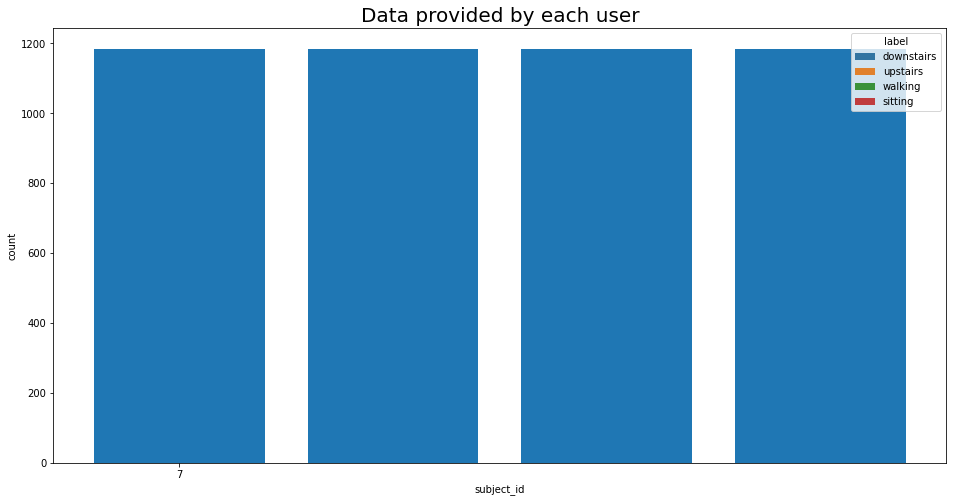

In [26]:
group_by_label = df.groupby(by=['subject_id'])
gpdf7 = group_by_label.get_group(7)
# gpdf7
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = gpdf7)
X = gpdf7[['acc_x', 'acc_y', 'acc_z']]
y = gpdf7['label']

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter


y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
plt.show()

Class=2, n=1884 (25.000%)
Class=0, n=1884 (25.000%)
Class=3, n=1884 (25.000%)
Class=1, n=1884 (25.000%)


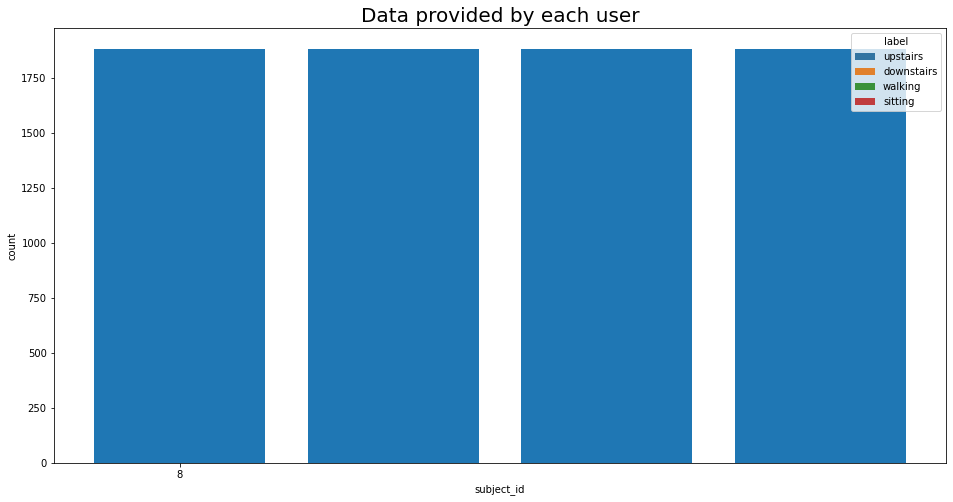

In [27]:
group_by_label = df.groupby(by=['subject_id'])
gpdf8 = group_by_label.get_group(8)
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = gpdf8)
X = gpdf8[['acc_x', 'acc_y', 'acc_z']]
y = gpdf8['label']

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter


y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
plt.show()

In [28]:
frames = [gpdf6, gpdf3, gpdf7, gpdf8]
df3 = pd.concat(frames)
df3

,datetime,acc_x,acc_y,acc_z,subject_id,type,label,activity
6318,2021-12-08 16:47:03+00:00,-14,-47,38,6,InMotion,downstairs,0
6319,2021-12-08 16:47:03.031250+00:00,-13,-45,39,6,InMotion,downstairs,0
6320,2021-12-08 16:47:03.062500+00:00,-12,-45,40,6,InMotion,downstairs,0
6321,2021-12-08 16:47:03.093750+00:00,-11,-45,41,6,InMotion,downstairs,0
6322,2021-12-08 16:47:03.125000+00:00,-8,-43,39,6,InMotion,downstairs,0
...,...,...,...,...,...,...,...,...
14875,2021-12-09 03:01:44.718750+00:00,-14,3,61,8,MotionLess,sitting,1
14876,2021-12-09 03:01:44.750000+00:00,-14,3,61,8,MotionLess,sitting,1
14877,2021-12-09 03:01:44.781250+00:00,-14,3,61,8,MotionLess,sitting,1
14878,2021-12-09 03:01:44.812500+00:00,-14,4,61,8,MotionLess,sitting,1


In [29]:
df3.subject_id.value_counts()

8    4796
6    3766
7    3546
3    2772
Name: subject_id, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler

X = df3[['acc_x', 'acc_y', 'acc_z']]
y = df3['activity']
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # scaled_X = pd.DataFrame(data = X, columns = ['accXmean',	'accYmean',	'accZmean',	'accXstd',	'accYstd',	'accZstd',	'MagnitudeMean', 'covXYmean',	'covYZmean',	'covXZmean'])
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

array([[-3.24114522, -0.81578619,  1.22113472],
       [-0.19004908,  0.720686  ,  1.17435735],
       [ 0.2942519 , -0.89073605, -0.46285082],
       ...,
       [ 0.73012278, -1.8463468 , -0.22896394],
       [ 1.69872473,  0.10234963,  1.92279537],
       [-0.38376947, -0.89073605,  0.4726967 ]])

Accuracy: 0.9543010752688172

 ------------------------------------------ RandomForestClassifier() Classification Report-------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2190
           1       0.94      0.88      0.91       786

    accuracy                           0.95      2976
   macro avg       0.95      0.93      0.94      2976
weighted avg       0.95      0.95      0.95      2976

 ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------


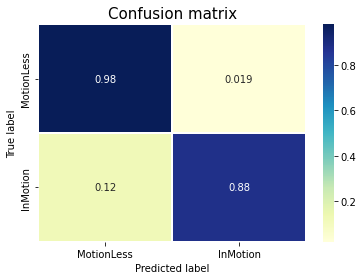

----------------------------------------------  RandomForestClassifier() K-Fold Report  ------------------------------------------------------ 

 * Results: [0.95799731 0.95530914 0.95262097 0.95228495]

 * Average acuracy: 0.9545530913978495 

<--------------------------------------------------------   END   ------------------------------------------------------------------>


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



classifiers = [
# KNeighborsClassifier(3),
# SVC(kernel="rbf", C=0.025, probability=True)
# NuSVC(probability=True),
RandomForestClassifier()
# DecisionTreeClassifier()
# AdaBoostClassifier()
# GradientBoostingClassifier()
]
for classifier in classifiers:
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                   ('classifier', classifier)])
# pipe.fit(X_train, y_train)   
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n ------------------------------------------", classifier , "Classification Report-------------------------------------------------\n")
    print(classification_report(y_test, y_pred))    


# K-Fold 
kfold = 4
results = cross_val_score(classifier, X_train, y_train, cv=kfold)


print(" ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------")
# labels = ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']
labels = ['MotionLess', 'InMotion']
_y_test = y_test
_y_pred = y_pred
confusion_matrix = confusion_matrix(_y_test, _y_pred)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# print(" ------------------------------------------------------ AUC SCORE -------------------------------------------------------------------")
# skplt.metrics.plot_roc_curve(y_test, y_pred)
# plt.show()
    
print("---------------------------------------------- ", classifier , "K-Fold Report  ------------------------------------------------------", "\n")
# print("model score: %.3f" % pipe.score(X_test, y_test))
# print('------------------------------------   REPORT   ----------------------------------', "\n")
print(' * Results: {}'.format(results))
print('\n * Average acuracy: {}'.format(np.mean(results)), "\n")

print('<--------------------------------------------------------   END   ------------------------------------------------------------------>')

0.9752129155193048


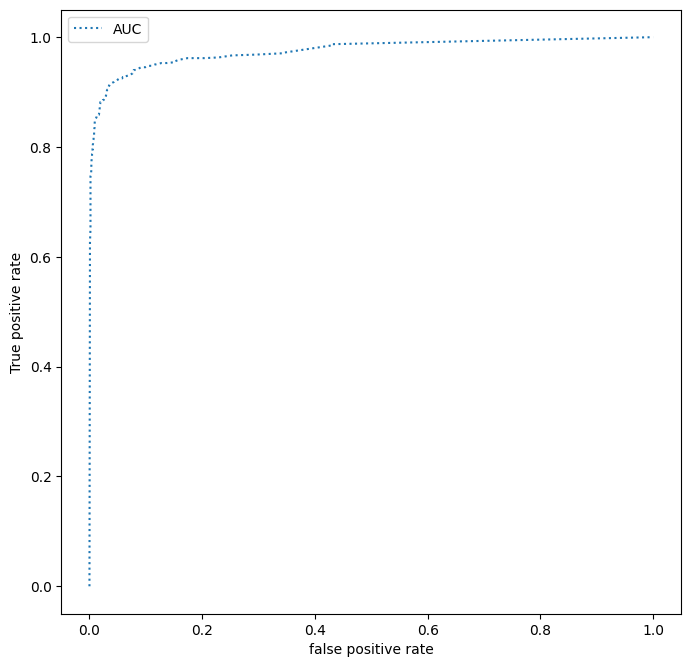

In [32]:
y_pred_probabilty = classifier.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_probabilty[:,1]))


from sklearn.metrics import roc_auc_score, roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred_probabilty[:,1])
auc = auc(fpr, tpr)

plt.figure(figsize=(8,8), dpi = 100)
plt.plot(fpr, tpr, linestyle = ':', label = 'AUC')

plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

subject_ids = list(df3.subject_id.unique())
subject_ids

LOOCV_accuracy = []
LOOCV_f1 = []
y_preds = []
y_tests = []



for subject in subject_ids:
    test = df3.loc[df3['subject_id']==subject]
    train = df3.loc[df3['subject_id']!=subject]
    
    
    train = train[['acc_x',	'acc_y', 'acc_z',	'activity']]
    test = test[['acc_x',	'acc_y', 'acc_z',	'activity']]
    
    X_train = train.iloc[:, :-1].values
    y_train = train.iloc[:, -1].values
    X_test = test.iloc[:, :-1].values
    y_test = test.iloc[:, -1].values
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Random Forest model
    clf = RandomForestClassifier(n_estimators=750,
    random_state=1337,
    max_depth=25,
    min_samples_leaf=1, class_weight='balanced_subsample' )
    
    #Fit and Predict using RF model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_preds = y_pred
    y_tests = y_test
    #Print Accuracy Score
    print('Completed LOOCV for Subject ', +  subject)
    
    LOOCV_accuracy.append(accuracy_score(y_test, y_pred))
    LOOCV_f1.append(f1_score(y_test, y_pred,average='weighted'))
    
    LOOCV_accuracy

Completed LOOCV for Subject  6
Completed LOOCV for Subject  3
Completed LOOCV for Subject  7
Completed LOOCV for Subject  8


In [34]:
LOOCV_accuracy

[0.7665958576739246,
 0.6958874458874459,
 0.8141567963902989,
 0.8127606338615513]

In [43]:
df

,datetime,acc_x,acc_y,acc_z,subject_id,type,label,activity
0,2021-12-08 14:50:11+00:00,-6,22,62,3,InMotion,downstairs,0
1,2021-12-08 14:50:11.031250+00:00,-7,20,61,3,InMotion,downstairs,0
2,2021-12-08 14:50:11.062500+00:00,-7,18,59,3,InMotion,downstairs,0
3,2021-12-08 14:50:11.093750+00:00,-8,16,58,3,InMotion,downstairs,0
4,2021-12-08 14:50:11.125000+00:00,-7,16,57,3,InMotion,downstairs,0
...,...,...,...,...,...,...,...,...
14875,2021-12-09 03:01:44.718750+00:00,-14,3,61,8,MotionLess,sitting,1
14876,2021-12-09 03:01:44.750000+00:00,-14,3,61,8,MotionLess,sitting,1
14877,2021-12-09 03:01:44.781250+00:00,-14,3,61,8,MotionLess,sitting,1
14878,2021-12-09 03:01:44.812500+00:00,-14,4,61,8,MotionLess,sitting,1


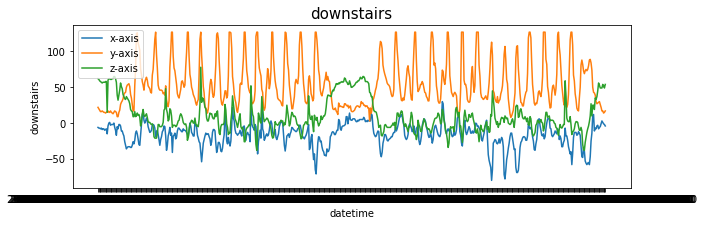

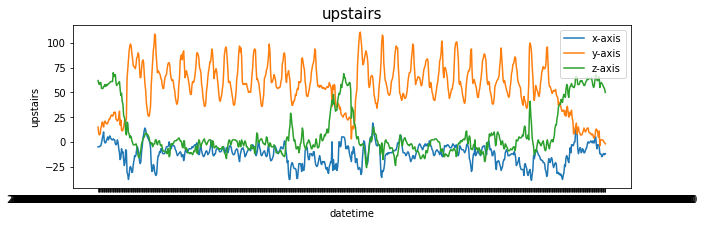

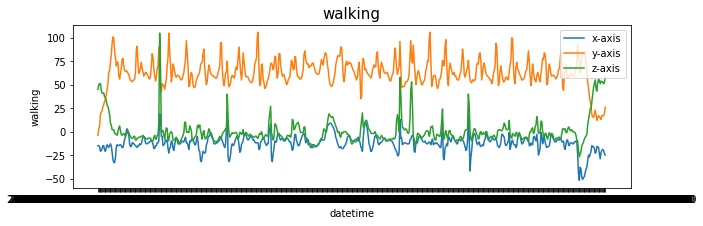

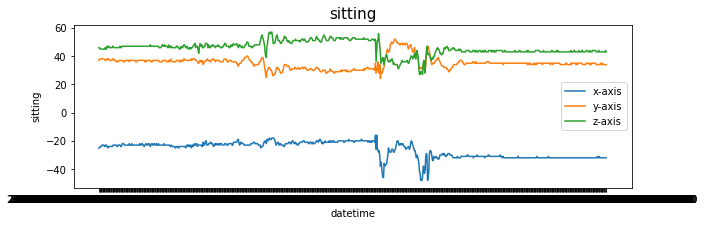

In [48]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df[(df['subject_id'] == 3) & (df['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'acc_x', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_y', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_z', x = 'datetime', data = data_df)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

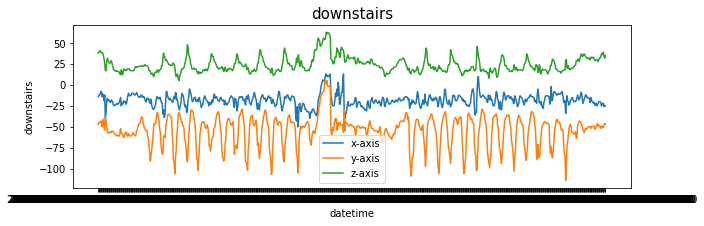

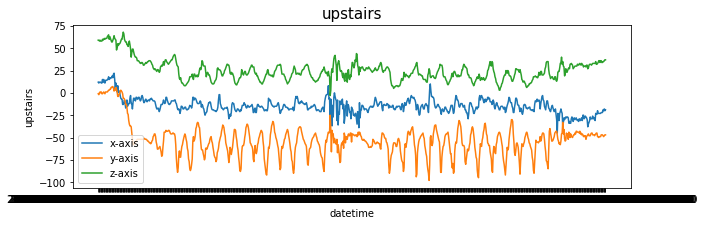

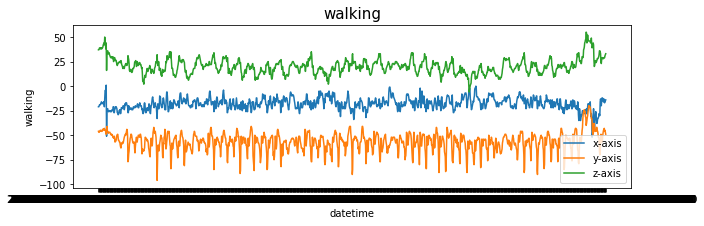

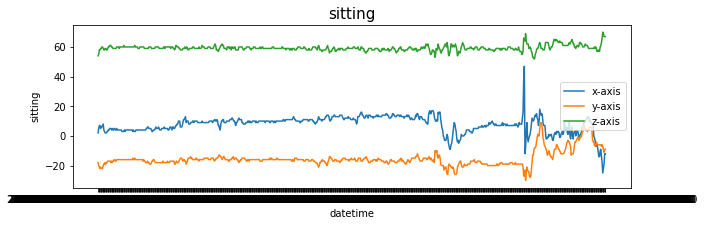

In [49]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df[(df['subject_id'] == 6) & (df['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'acc_x', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_y', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_z', x = 'datetime', data = data_df)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

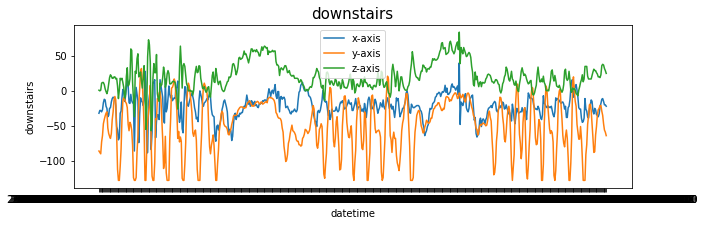

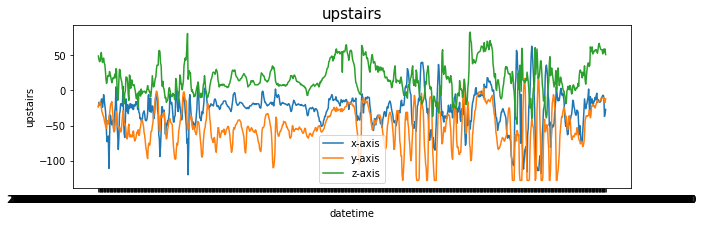

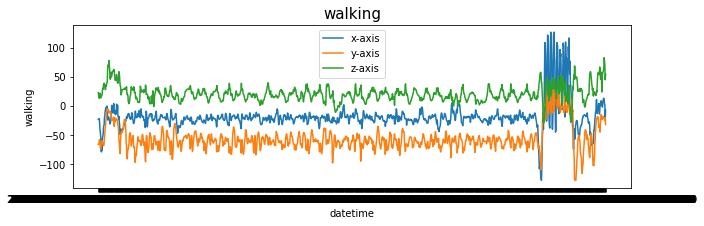

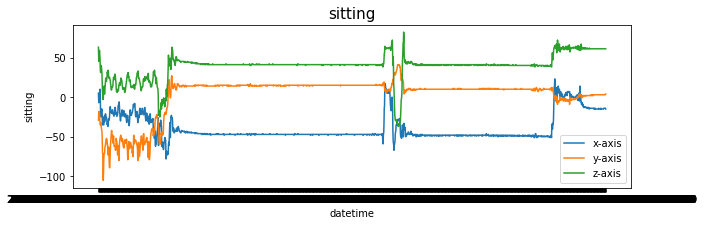

In [52]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df[(df['subject_id'] == 8) & (df['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'acc_x', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_y', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_z', x = 'datetime', data = data_df)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

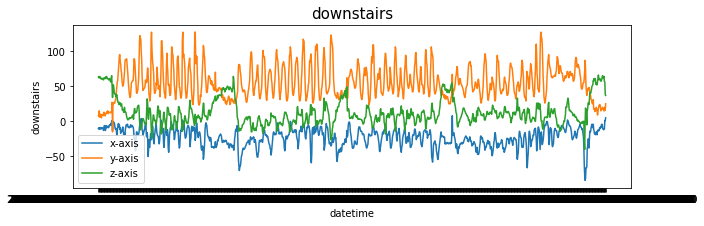

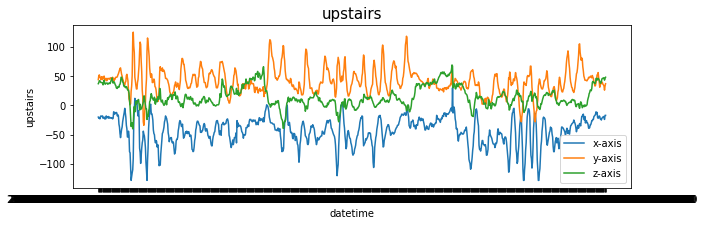

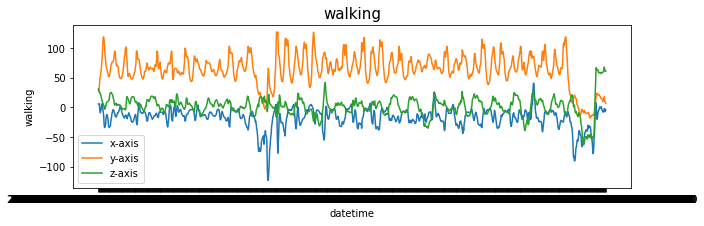

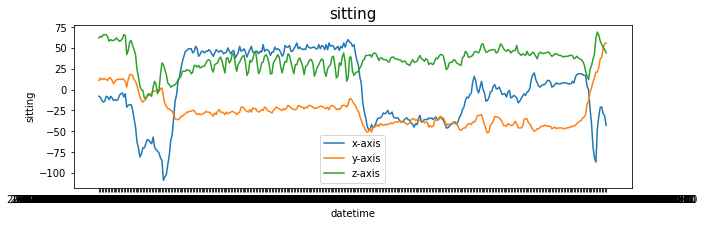

In [51]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df[(df['subject_id'] == 7) & (df['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'acc_x', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_y', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_z', x = 'datetime', data = data_df)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [56]:
df3 = df.copy()
df3['Magnitude'] = np.sqrt(df3['acc_x']**2 + df3['acc_y']**2 + df3['acc_z']**2)
df3['Magnitude']
df3

,datetime,acc_x,acc_y,acc_z,subject_id,type,label,activity,Magnitude
0,2021-12-08 14:50:11+00:00,-6,22,62,3,InMotion,downstairs,0,66.060578
1,2021-12-08 14:50:11.031250+00:00,-7,20,61,3,InMotion,downstairs,0,64.575537
2,2021-12-08 14:50:11.062500+00:00,-7,18,59,3,InMotion,downstairs,0,62.080593
3,2021-12-08 14:50:11.093750+00:00,-8,16,58,3,InMotion,downstairs,0,60.695964
4,2021-12-08 14:50:11.125000+00:00,-7,16,57,3,InMotion,downstairs,0,59.615434
...,...,...,...,...,...,...,...,...,...
14875,2021-12-09 03:01:44.718750+00:00,-14,3,61,8,MotionLess,sitting,1,62.657801
14876,2021-12-09 03:01:44.750000+00:00,-14,3,61,8,MotionLess,sitting,1,62.657801
14877,2021-12-09 03:01:44.781250+00:00,-14,3,61,8,MotionLess,sitting,1,62.657801
14878,2021-12-09 03:01:44.812500+00:00,-14,4,61,8,MotionLess,sitting,1,62.713635


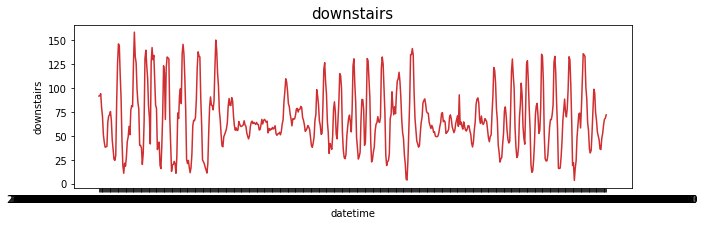

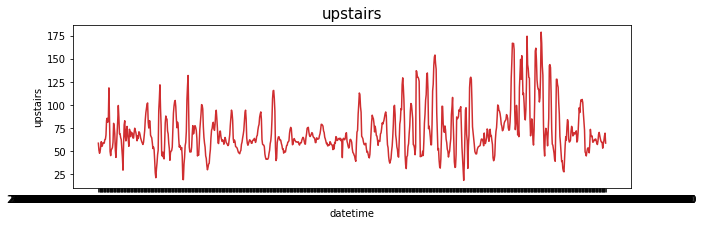

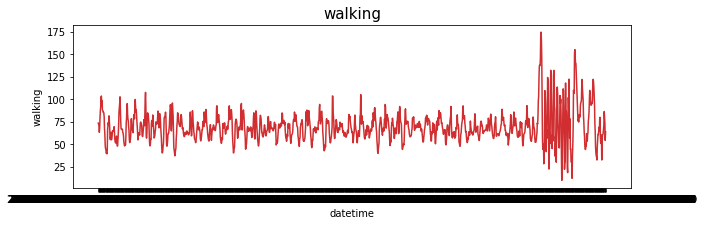

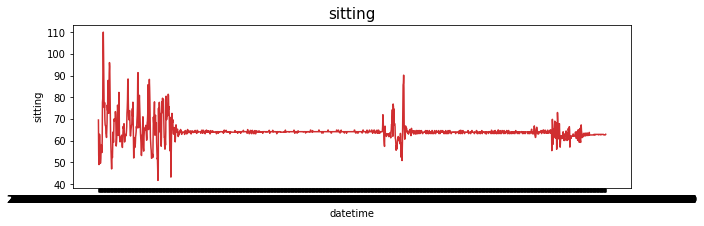

In [77]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df3[(df3['subject_id'] == 8) & (df3['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'Magnitude', x = 'datetime', data = data_df)

#   plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

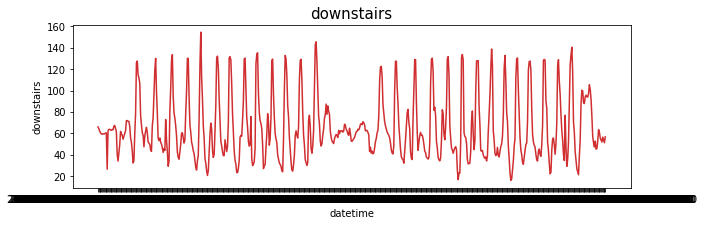

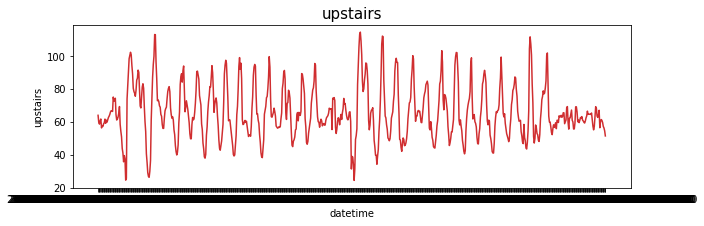

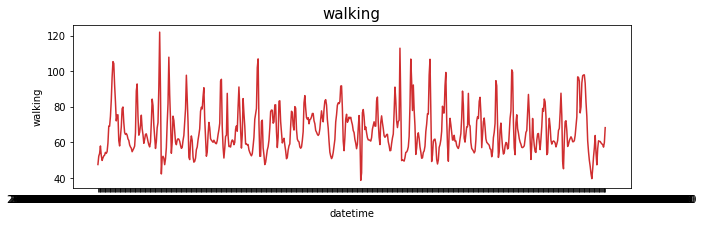

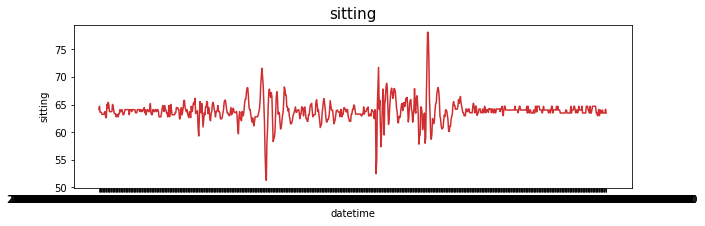

In [78]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df3[(df3['subject_id'] == 3) & (df3['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'Magnitude', x = 'datetime', data = data_df)

#   plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

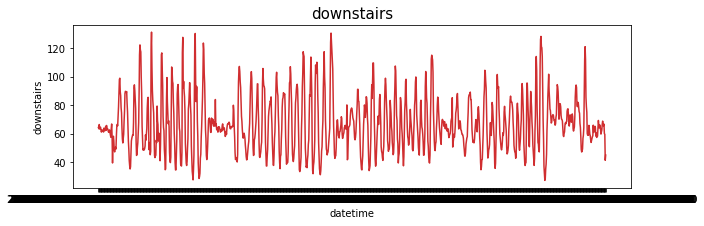

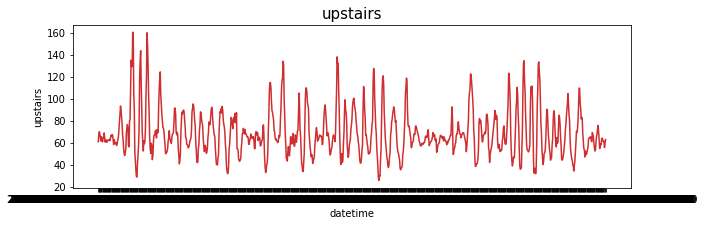

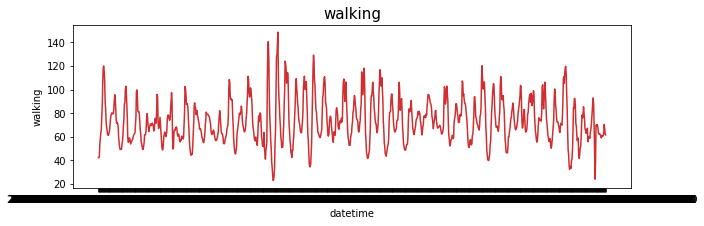

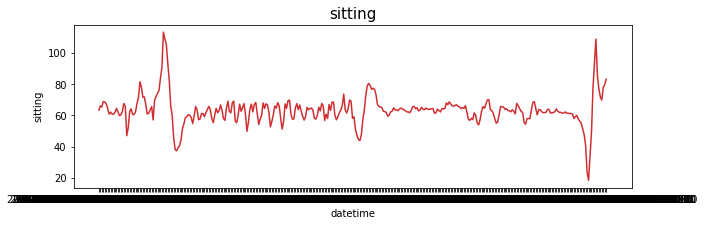

In [79]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df3[(df3['subject_id'] == 7) & (df3['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'Magnitude', x = 'datetime', data = data_df)

#   plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

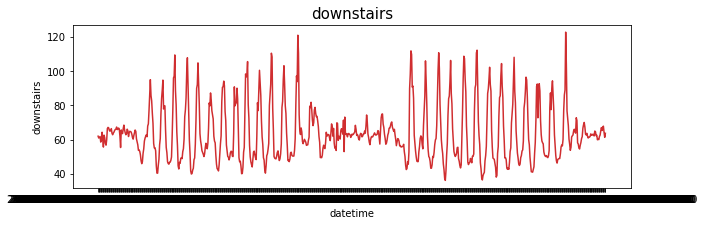

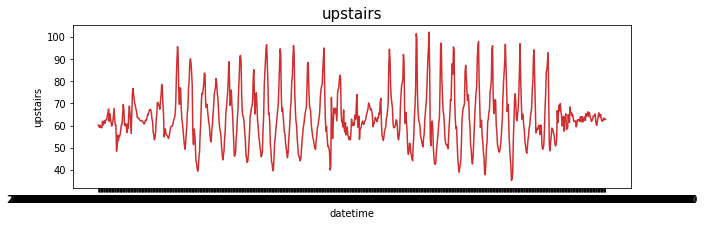

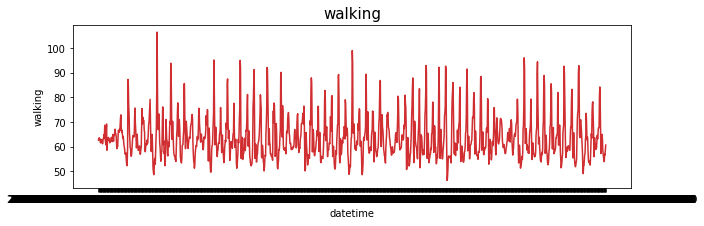

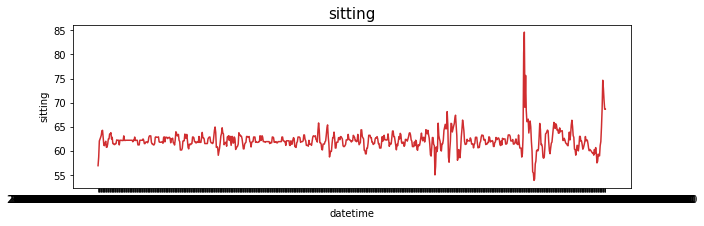

In [80]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df3[(df3['subject_id'] == 6) & (df3['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'Magnitude', x = 'datetime', data = data_df)

#   plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, 

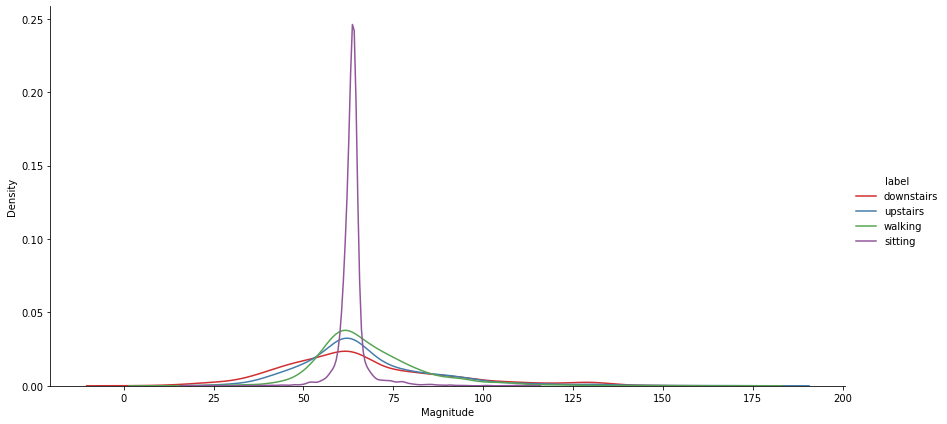

In [58]:
sns.set_palette("Set1", desat = 0.80)
facetgrid = sns.FacetGrid(df3, hue = "label", size = 6, aspect=2)
facetgrid.map(sns.distplot, 'Magnitude', hist=False).add_legend()
plt.show()

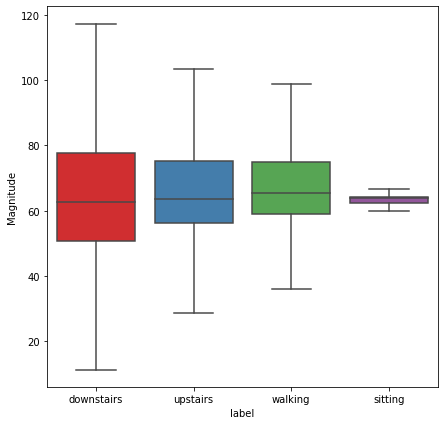

In [59]:
plt.figure(figsize=(7,7))
sns.boxplot(x = 'label', y = 'Magnitude', data = df3, showfliers = False, saturation=1)
plt.show()


In [71]:
gpdf3['Magnitude'] = np.sqrt(gpdf3['acc_x']**2 + gpdf3['acc_y']**2 + gpdf3['acc_z']**2)
gpdf3

C:\Users\govindd1\AppData\Local\Temp/ipykernel_426472/4234681037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf3['Magnitude'] = np.sqrt(gpdf3['acc_x']**2 + gpdf3['acc_y']**2 + gpdf3['acc_z']**2)


,datetime,acc_x,acc_y,acc_z,subject_id,type,label,activity,Magnitude
0,2021-12-08 14:50:11+00:00,-6,22,62,3,InMotion,downstairs,0,66.060578
1,2021-12-08 14:50:11.031250+00:00,-7,20,61,3,InMotion,downstairs,0,64.575537
2,2021-12-08 14:50:11.062500+00:00,-7,18,59,3,InMotion,downstairs,0,62.080593
3,2021-12-08 14:50:11.093750+00:00,-8,16,58,3,InMotion,downstairs,0,60.695964
4,2021-12-08 14:50:11.125000+00:00,-7,16,57,3,InMotion,downstairs,0,59.615434
...,...,...,...,...,...,...,...,...,...
2767,2021-12-08 14:51:42.468750+00:00,-32,34,43,3,MotionLess,sitting,1,63.474404
2768,2021-12-08 14:51:42.500000+00:00,-32,34,43,3,MotionLess,sitting,1,63.474404
2769,2021-12-08 14:51:42.531250+00:00,-32,34,43,3,MotionLess,sitting,1,63.474404
2770,2021-12-08 14:51:42.562500+00:00,-32,34,44,3,MotionLess,sitting,1,64.156060


In [72]:
gpdf6['Magnitude'] = np.sqrt(gpdf6['acc_x']**2 + gpdf6['acc_y']**2 + gpdf6['acc_z']**2)
gpdf6

C:\Users\govindd1\AppData\Local\Temp/ipykernel_426472/4291173304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf6['Magnitude'] = np.sqrt(gpdf6['acc_x']**2 + gpdf6['acc_y']**2 + gpdf6['acc_z']**2)


,datetime,acc_x,acc_y,acc_z,subject_id,type,label,activity,Magnitude
6318,2021-12-08 16:47:03+00:00,-14,-47,38,6,InMotion,downstairs,0,62.040309
6319,2021-12-08 16:47:03.031250+00:00,-13,-45,39,6,InMotion,downstairs,0,60.950800
6320,2021-12-08 16:47:03.062500+00:00,-12,-45,40,6,InMotion,downstairs,0,61.392182
6321,2021-12-08 16:47:03.093750+00:00,-11,-45,41,6,InMotion,downstairs,0,61.862751
6322,2021-12-08 16:47:03.125000+00:00,-8,-43,39,6,InMotion,downstairs,0,58.600341
...,...,...,...,...,...,...,...,...,...
10079,2021-12-08 16:49:08.531250+00:00,-25,-7,70,6,MotionLess,sitting,1,74.659226
10080,2021-12-08 16:49:08.562500+00:00,-22,-9,69,6,MotionLess,sitting,1,72.979449
10081,2021-12-08 16:49:08.593750+00:00,-19,-11,67,6,MotionLess,sitting,1,70.505319
10082,2021-12-08 16:49:08.625000+00:00,-12,-9,67,6,MotionLess,sitting,1,68.658576


In [73]:
gpdf7['Magnitude'] = np.sqrt(gpdf7['acc_x']**2 + gpdf7['acc_y']**2 + gpdf7['acc_z']**2)
gpdf8['Magnitude'] = np.sqrt(gpdf8['acc_x']**2 + gpdf8['acc_y']**2 + gpdf8['acc_z']**2)



C:\Users\govindd1\AppData\Local\Temp/ipykernel_426472/1359484154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf7['Magnitude'] = np.sqrt(gpdf7['acc_x']**2 + gpdf7['acc_y']**2 + gpdf7['acc_z']**2)
C:\Users\govindd1\AppData\Local\Temp/ipykernel_426472/1359484154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf8['Magnitude'] = np.sqrt(gpdf8['acc_x']**2 + gpdf8['acc_y']**2 + gpdf8['acc_z']**2)


array([<AxesSubplot:>], dtype=object)

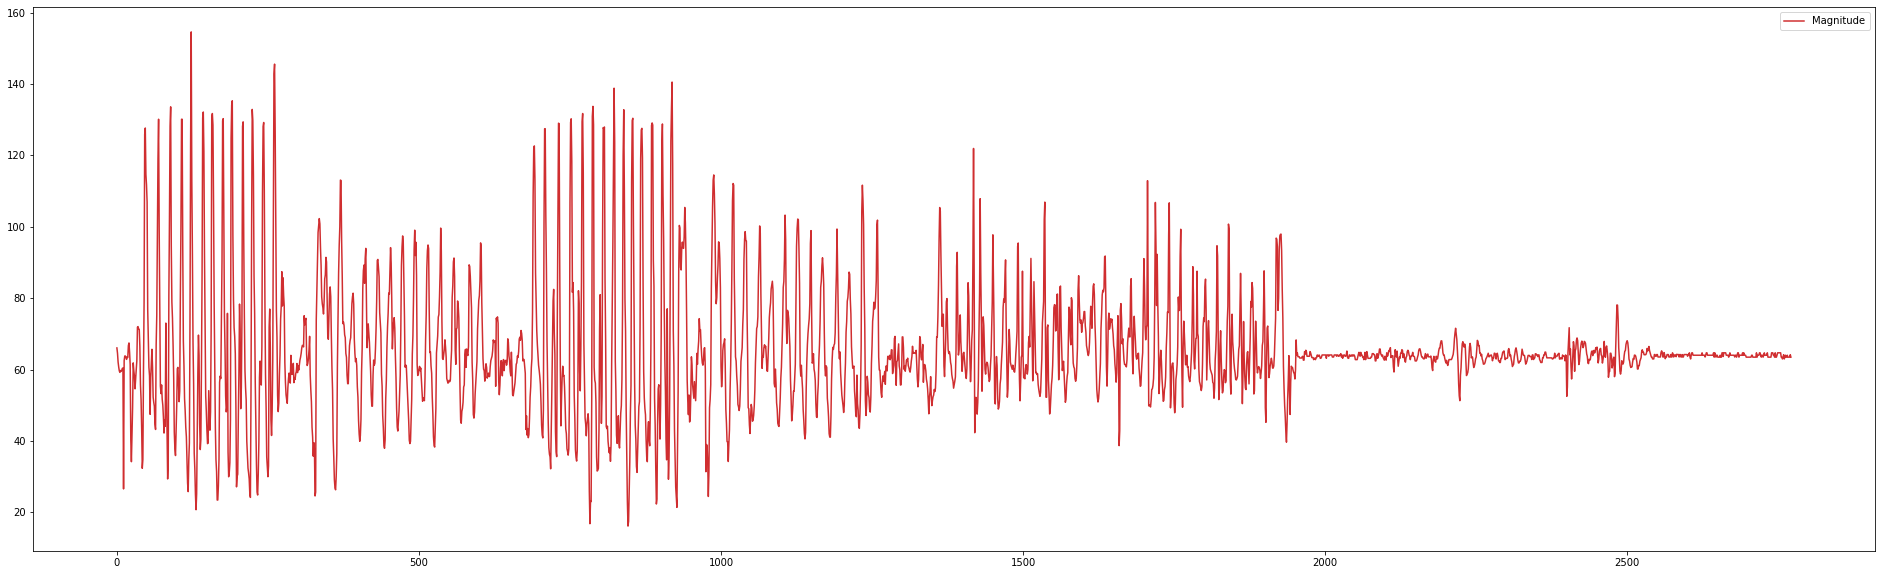

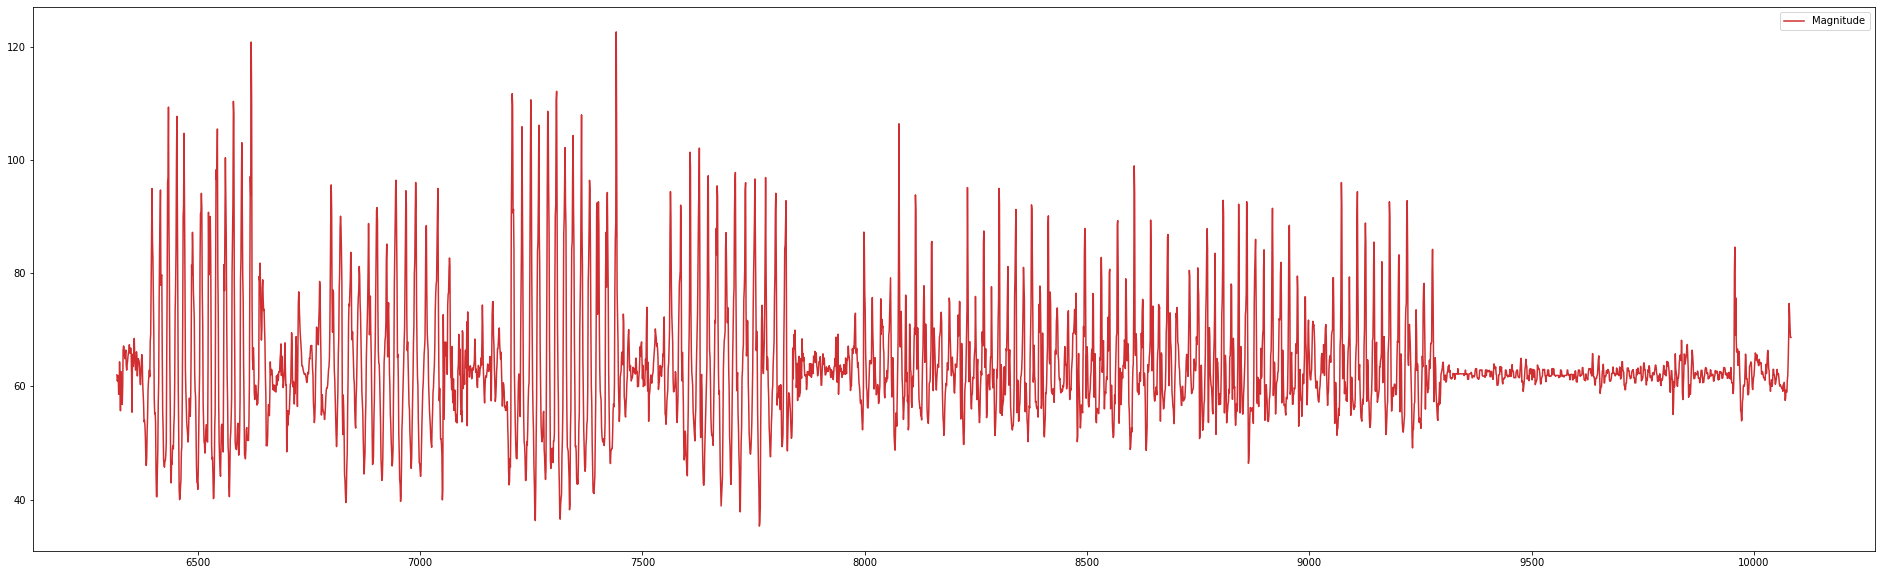

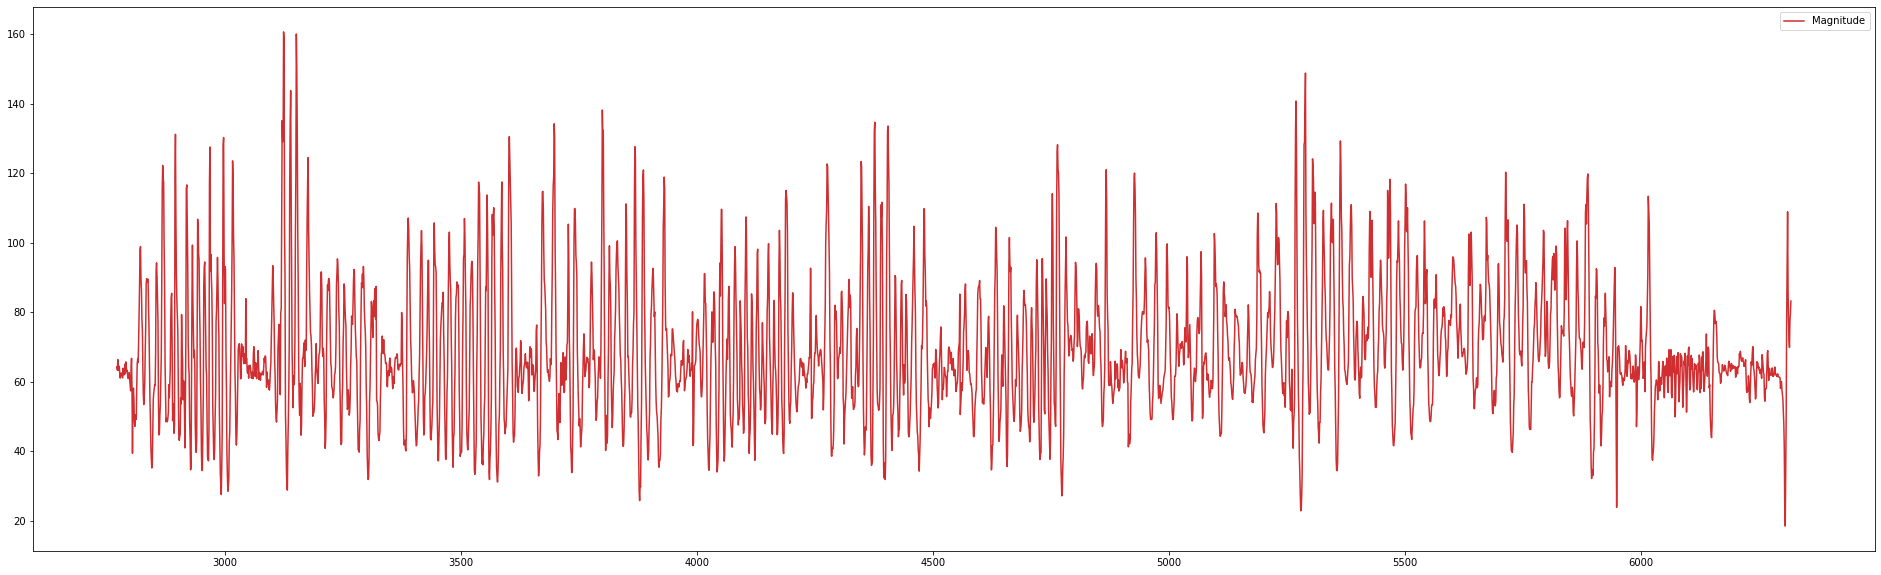

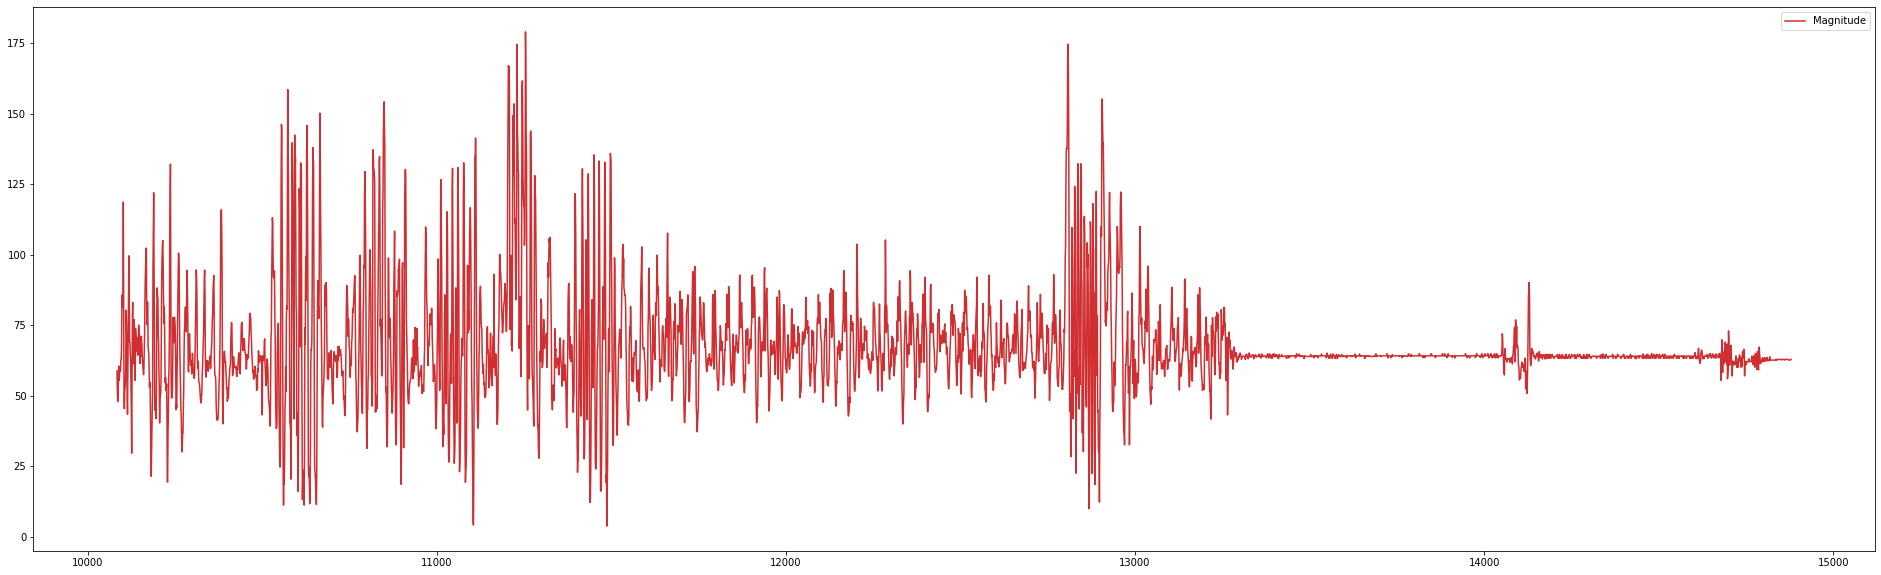

In [75]:
gpdf3[['Magnitude']].plot(subplots=True, figsize=(33, 10))
gpdf6[['Magnitude']].plot(subplots=True, figsize=(33, 10))
gpdf7[['Magnitude']].plot(subplots=True, figsize=(33, 10))
gpdf8[['Magnitude']].plot(subplots=True, figsize=(33, 10))


In [ ]:
moving Variance
model prediction